In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from model import LogisticRegression

torch.manual_seed(0)

# Titanic data

In [2]:
path_csv = "data/titanic_modified_dataset.csv"
titanic_data_df = pd.read_csv(path_csv, index_col="PassengerId")
titanic_data_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [3]:
# convert to tensor
titanic_data_arr = torch.tensor(titanic_data_df.values, dtype=torch.float32)

# devide features to X, label to y 
X, y = titanic_data_arr[:, :-1], titanic_data_arr[:, -1]


# add bias to X
bias = torch.ones((X.shape[0], 1))
X_b = torch.cat((bias, X), dim=1)

TRAIN_SIZE = 0.7
VAL_SIZE = 0.2
#TEST_SIZE = 0.1
TRAIN_SAMPLES = int(TRAIN_SIZE * titanic_data_arr.shape[0])
VAL_SAMPLES = TRAIN_SAMPLES + int(VAL_SIZE * titanic_data_arr.shape[0])

x_train, y_train = X_b[:TRAIN_SAMPLES], y[:TRAIN_SAMPLES]
x_val, y_val = X_b[TRAIN_SAMPLES:VAL_SAMPLES], y[TRAIN_SAMPLES:VAL_SAMPLES]
x_test, y_test = X_b[VAL_SAMPLES:], y[VAL_SAMPLES:]

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

torch.Size([623, 9]) torch.Size([178, 9]) torch.Size([90, 9])
torch.Size([623]) torch.Size([178]) torch.Size([90])


## Training

In [4]:
n_features = x_train.shape[1]
n_iters = 100

## Batch_size = 1, learning_rate = 0.0001

In [5]:
batch_size = 1
learning_rate = 0.0001
LRModel = LogisticRegression(batch_size, n_features, type="binary")
history = LRModel.fit(x_train, y_train, x_val, y_val, n_iters, learning_rate)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 10, loss: 0.1294948160648346, acc: 0.6003210544586182, loss_val: 0.8643190264701843, acc_val: 0.5955055952072144
Epoch: 20, loss: 0.20938685536384583, acc: 0.6372391581535339, loss_val: 0.7669235467910767, acc_val: 0.6348314881324768
Epoch: 30, loss: 0.3134506046772003, acc: 0.6597110629081726, loss_val: 0.6935458779335022, acc_val: 0.6797752976417542
Epoch: 40, loss: 0.43217453360557556, acc: 0.6741573214530945, loss_val: 0.642810583114624, acc_val: 0.6853932738304138
Epoch: 50, loss: 0.5525671243667603, acc: 0.6998394727706909, loss_val: 0.6102710366249084, acc_val: 0.7191011309623718
Epoch: 60, loss: 0.6646758913993835, acc: 0.6998394727706909, loss_val: 0.5902454853057861, acc_val: 0.7303370833396912
Epoch: 70, loss: 0.7639909982681274, acc: 0.7142857313156128, loss_val: 0.5779476165771484, acc_val: 0.7359550595283508
Epoch: 80, loss: 0.8499903082847595, acc: 0.7239165306091309, loss_val: 0.5701792240142822, acc_val: 0.7415730357170105
Epoch: 90, loss: 0.9240300059318542, ac

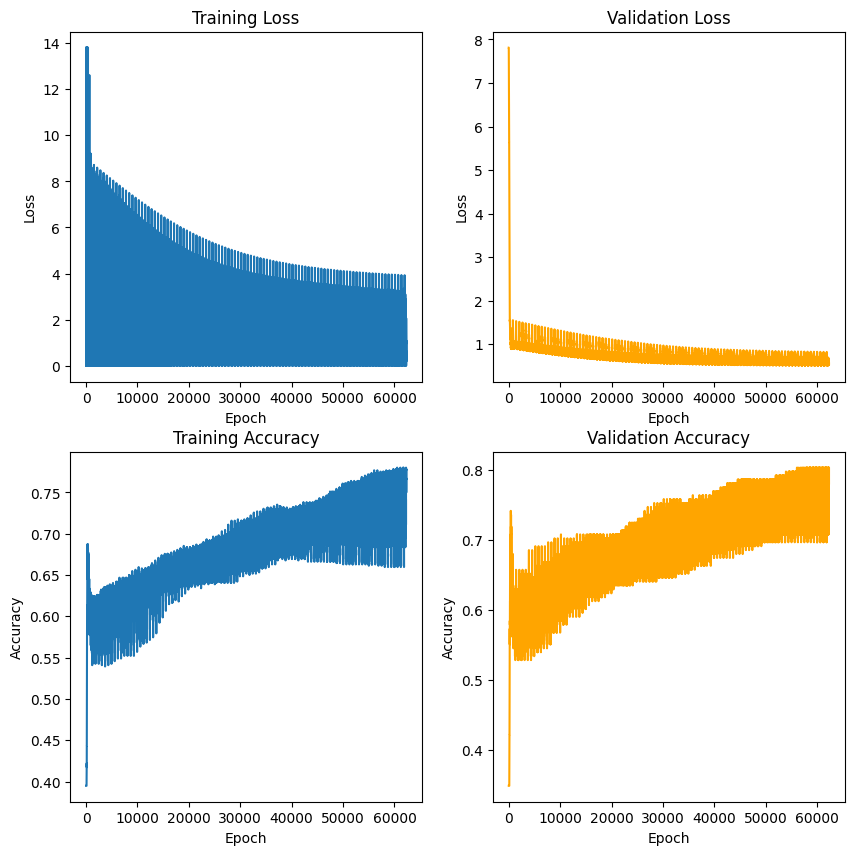

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].plot(history["losses_train"])
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(history['losses_val'], 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(history['accs_train'])
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(history['accs_val'], 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

## Batch_size = 32, learning_rate = 0.001

In [7]:
batch_size = 32
learning_rate = 0.001
LRModel = LogisticRegression(batch_size, n_features, type="binary")
history = LRModel.fit(x_train, y_train, x_val, y_val, n_iters, learning_rate)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 10, loss: 0.5498228073120117, acc: 0.6677367687225342, loss_val: 0.7780820727348328, acc_val: 0.6966292262077332
Epoch: 20, loss: 0.5327665209770203, acc: 0.6821829676628113, loss_val: 0.7499935626983643, acc_val: 0.6966292262077332
Epoch: 30, loss: 0.5173056721687317, acc: 0.6886035203933716, loss_val: 0.7239415049552917, acc_val: 0.7078651785850525
Epoch: 40, loss: 0.5034723281860352, acc: 0.6934189200401306, loss_val: 0.6999927759170532, acc_val: 0.7134831547737122
Epoch: 50, loss: 0.4912669062614441, acc: 0.6950240731239319, loss_val: 0.6781846880912781, acc_val: 0.7134831547737122
Epoch: 60, loss: 0.4806568920612335, acc: 0.7062600255012512, loss_val: 0.658518373966217, acc_val: 0.7134831547737122
Epoch: 70, loss: 0.47157639265060425, acc: 0.7158908247947693, loss_val: 0.6409562230110168, acc_val: 0.7191011309623718
Epoch: 80, loss: 0.4639297425746918, acc: 0.7142857313156128, loss_val: 0.625418484210968, acc_val: 0.7247191071510315
Epoch: 90, loss: 0.4575975239276886, acc:

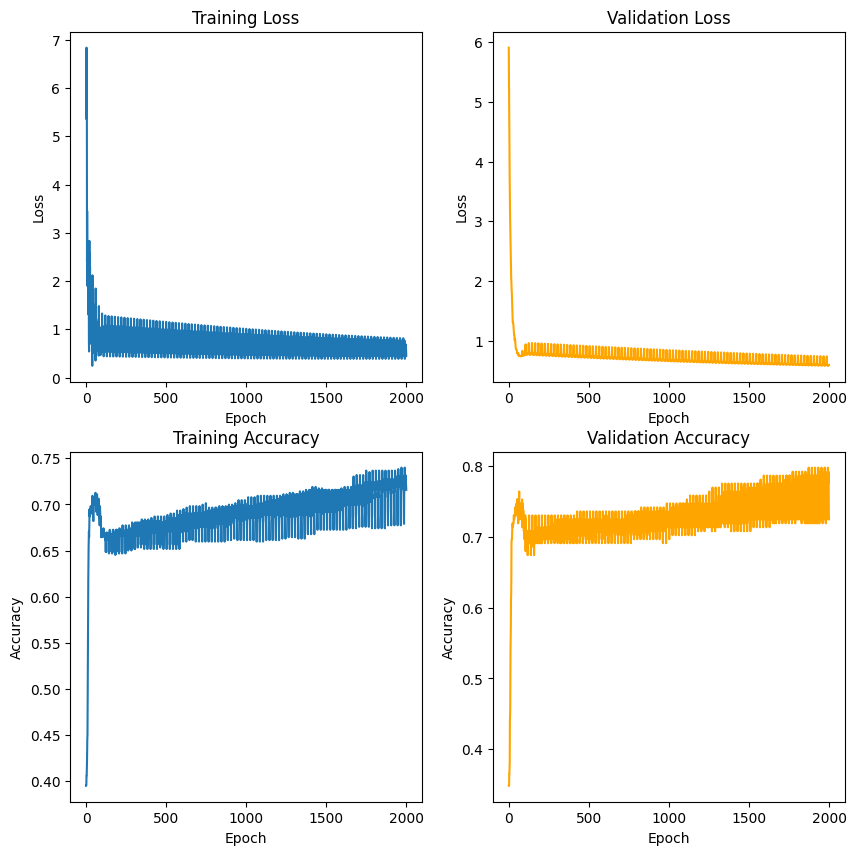

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].plot(history["losses_train"])
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(history['losses_val'], 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(history['accs_train'])
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(history['accs_val'], 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

## Batch_size = n_sample, learning_rate = 0.001

In [9]:
batch_size = len(x_train)
learning_rate = 0.001
LRModel = LogisticRegression(batch_size, n_features, type="binary")
history = LRModel.fit(x_train, y_train, x_val, y_val, n_iters, learning_rate)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 10, loss: 8.343951225280762, acc: 0.3948635756969452, loss_val: 8.994771003723145, acc_val: 0.3483146131038666
Epoch: 20, loss: 8.27391529083252, acc: 0.3948635756969452, loss_val: 8.841841697692871, acc_val: 0.3483146131038666
Epoch: 30, loss: 7.215351581573486, acc: 0.3948635756969452, loss_val: 7.332597732543945, acc_val: 0.3483146131038666
Epoch: 40, loss: 4.050527095794678, acc: 0.3739967942237854, loss_val: 4.427651882171631, acc_val: 0.2921348214149475
Epoch: 50, loss: 1.9905892610549927, acc: 0.3531300127506256, loss_val: 2.386230230331421, acc_val: 0.28651684522628784
Epoch: 60, loss: 1.120411992073059, acc: 0.5345104336738586, loss_val: 1.3890540599822998, acc_val: 0.516853928565979
Epoch: 70, loss: 0.876972496509552, acc: 0.6805778741836548, loss_val: 0.9903362393379211, acc_val: 0.6910112500190735
Epoch: 80, loss: 0.8380732536315918, acc: 0.70465487241745, loss_val: 0.8940150141716003, acc_val: 0.7415730357170105
Epoch: 90, loss: 0.8302969932556152, acc: 0.7014446258

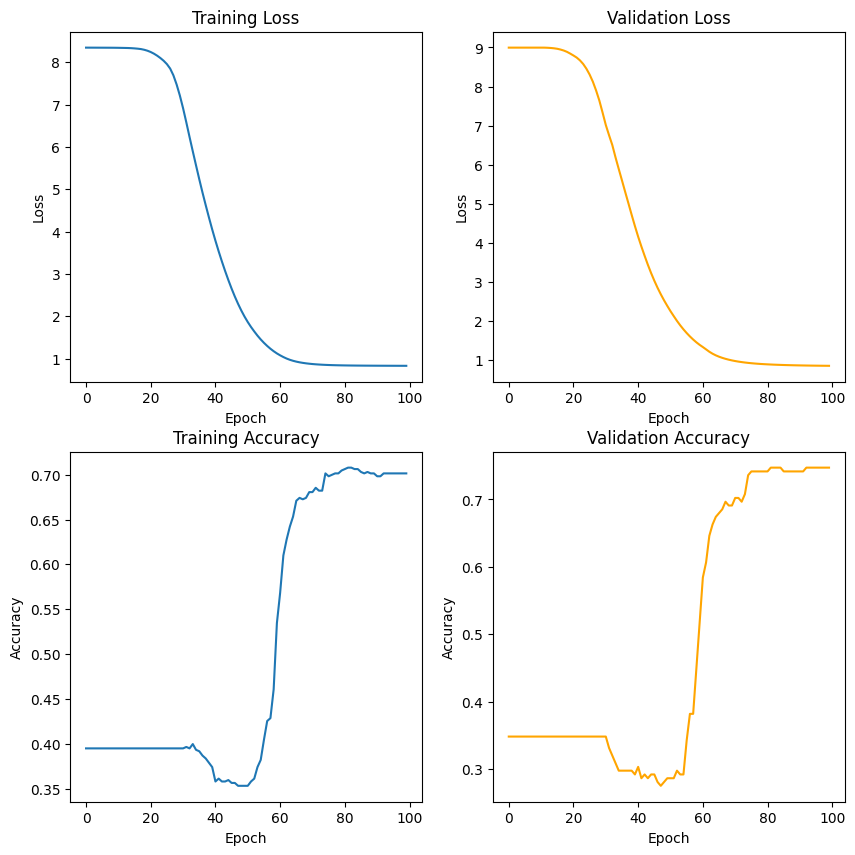

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].plot(history["losses_train"])
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(history['losses_val'], 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(history['accs_train'])
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(history['accs_val'], 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

# MNIST data

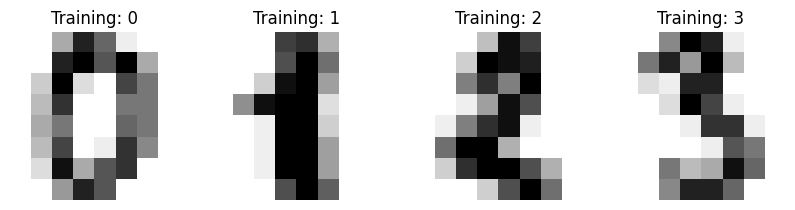

In [11]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [12]:
def one_hot(y, c):
    
    # y--> label/ground truth.
    # c--> Number of classes.
    
    # A zero matrix of size (m, c)
    y_hot = torch.zeros((len(y), c))
    
    # Putting 1 for column where the label is,
    # Using multidimensional indexing.
    y_hot[torch.arange(len(y)), y] = 1
    
    return y_hot

In [13]:
# convert digits to tensor 
digits.images = torch.tensor(digits.images, dtype=torch.float32)
# flatten the images
n_samples = len(digits.images)
num_class = 10
data = digits.images.reshape((n_samples, -1))
# normalize the data
data = data / 255.0
bias = torch.ones((data.shape[0], 1))
data = torch.cat((data, bias), dim=1)

# Split data into 50% train and 50% test subsets
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True)
y_train = one_hot(y_train, num_class)
y_test = one_hot(y_test, num_class)

In [14]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

torch.Size([1437, 65]) torch.Size([360, 65]) torch.Size([1437, 10]) torch.Size([360, 10])


In [15]:
batch_size = 64
learning_rate = 2
n_iters = 100
n_features = x_train.shape[1]
LRModel = LogisticRegression(batch_size, n_features, type='multi', num_class= num_class)
history = LRModel.fit(x_train, y_train, x_test, y_test, n_iters, learning_rate)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 10, loss: 0.19801922142505646, acc: 0.8999999761581421, loss_val: 0.19962620735168457, acc_val: 0.8999999761581421
Epoch: 20, loss: 0.17082102596759796, acc: 0.8999999761581421, loss_val: 0.1732425093650818, acc_val: 0.8999999761581421
Epoch: 30, loss: 0.14893746376037598, acc: 0.8999999761581421, loss_val: 0.15184727311134338, acc_val: 0.8999999761581421
Epoch: 40, loss: 0.13134488463401794, acc: 0.8999999761581421, loss_val: 0.13459084928035736, acc_val: 0.8999999761581421
Epoch: 50, loss: 0.11713311821222305, acc: 0.903827428817749, loss_val: 0.1206599771976471, acc_val: 0.9044444561004639
Epoch: 60, loss: 0.10555001348257065, acc: 0.916005551815033, loss_val: 0.10934819281101227, acc_val: 0.9158333539962769
Epoch: 70, loss: 0.09600319713354111, acc: 0.928114116191864, loss_val: 0.10008072853088379, acc_val: 0.9255555272102356
Epoch: 80, loss: 0.0880393460392952, acc: 0.9382045865058899, loss_val: 0.09240801632404327, acc_val: 0.933055579662323
Epoch: 90, loss: 0.081316202878

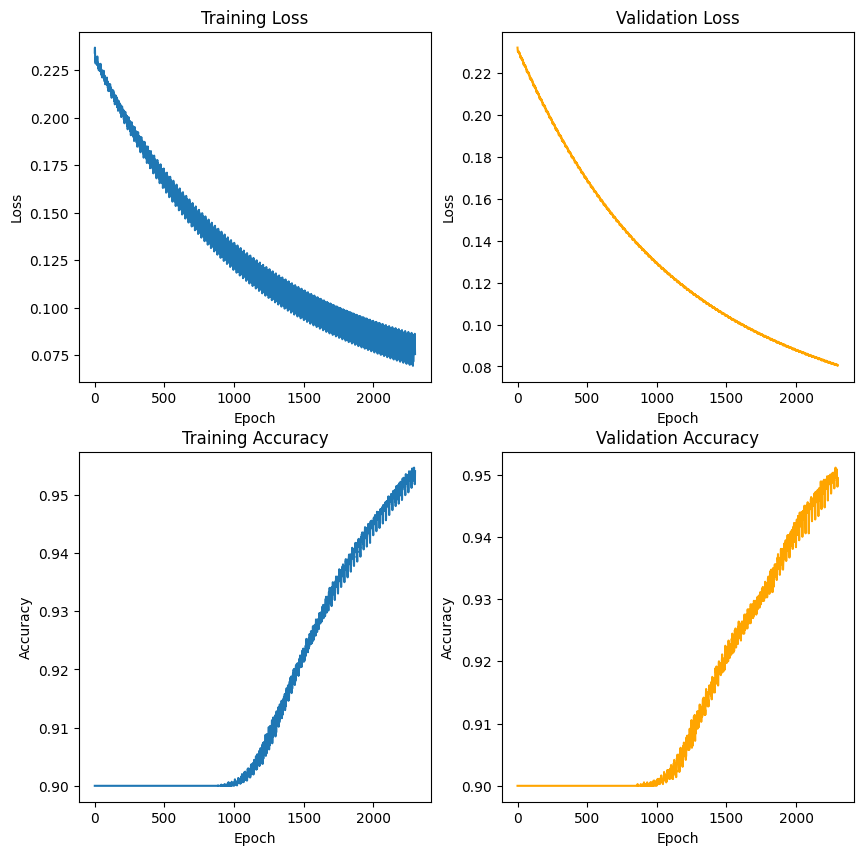

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].plot(history["losses_train"])
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(history['losses_val'], 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(history['accs_train'])
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(history['accs_val'], 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()